# 1. 关系抽取简介

&emsp;&emsp;关系抽取通常在实体抽取与实体链指之后。在识别出句子中的关键实体后，还需要抽取两个实体或多个实体之间的语义关系。语义关系通常用于连接两个实体，并与实体一起表达文本的主要含义。常见的关系抽取结果可以用SPO结构的三元组来表示，即 (Subject, Predication, Object)，如`中国的首都是北京 ==> (中国, 首都, 北京)`

- 关系抽取的分类：
    - 是否有确定的关系集合：
        - 限定关系抽取：事先确定好所有需要抽取的关系集合，则可讲关系抽取看作是一中关系判断问题，或者说是分类问题。
        - 开放式关系抽取：需要抽取的关系集合是不确定的，另一方面抽取预料的所属领域也可能是不确定的。
    - 关系抽取可以用有监督、半监督甚至无监督的方法来做：
        - 有监督学习：监督学习的关系集合通常是确定的，我们仅需要将其当作一个简单的分类问题来处理即可。高质量监督数据下的监督学习模型的准确率会很高，但缺点就是需要大量的人力成本和时间成本来对文本数据进行标注，且其难以扩展新的关系类别，模型较为脆弱，泛化能力有限。
        - 半监督学习：半监督学习利用少量的标注信息作为种子模版，从非结构化数据中抽取大量的新的实例来构成新的训练数据。主要方法包括 Bootstraping 以及远程监督学习的方法
        - 无监督学习：一般利用语料中存在的大量冗余信息做聚类，在聚类结果的基础上给定关系，但由于聚类方法本身就存在难以描述关系和低频实例召回率低的问题，因此无监督学习一般难以得很好的抽取效果。
    - 有监督学习两种分类：
        - Pipline：将实体抽取与关系抽取分为两个独立的过程，关系抽取依赖实体抽取的结果，容易造成误差累积。
        - Joint Model：实体抽取与关系抽取同时进行，通常用模型参数共享的方法来实现。

# 2. 论文解读

## 2.1 Relation Classification via Convolutional Deep Neural Network

- 论文链接：<https://www.aclweb.org/anthology/C14-1220/>
- 论文时间：2014年
- 源码：https://github.com/FrankWork/conv_relation
- 复现：
- 类型：有监督学习-pipline模型
- 简介：给定一个句子S和名词对e_1和e_2，判断e_1和e_2的关系，即将关系抽取问题等效为一个关系分类问题。模型选择CNN

- 输入：
    - 词向量窗口：shape为{batch, seq_length, word_dim}。假设窗口(windows)为3，则选取start word1 word2拼接后的向量为维度seq_length的第0个，word1 word2 word3拼接后的向量为seq_length的第一个，以此类推。
    - 位置向量：维度为pos_dim，可以与word_dim不一样，本论文设为5:
        - position1的位置向量：首先得到相对位置列表：seq_length个token距离entity1的相对距离，entity1的位置标记为61，在entity1左边的token相对距离标记为0-60，如60表示与entity1的索引仅相差1，且在entity1的左边。然后通过相对位置向量矩阵通过lookup得到position1的位置向量，shape为[batch, seq_length, pos_dim]
        - position2的位置向量：同position1
    - 最终输入：词向量窗口、position1的位置向量、position2的位置向量进行拼接
- 模型：
    - TextCNN模型，filters等参数可根据情况调节，包含卷积层和最大池化层，池化后结果再通过一个全连接层，激活函数为tanh
    - sentence level feature：通过TextCNN模型得到的输出在论文中称为**sentence level feature**
- 输出层：
    - 输入：将模型得到sentence level feature与**lexical level features**进行拼接：
        - lexical level feature：
            - entity1的词向量
            - entity2的词向量
            - entity1的前一个和后一个词的词向量
            - entity2的前一个和后一个词的词向量
            - entity1和entity2同属于WordNet的一个上位词词向量。如猫和狗的上位词可以是动物或者宠物，具体需要参考WordNet词典构成
            - 将以上向量进行拼接作为lexical level feature
    - 输出：将上方输入送到全连接层后进行softmax
- 模型架构图：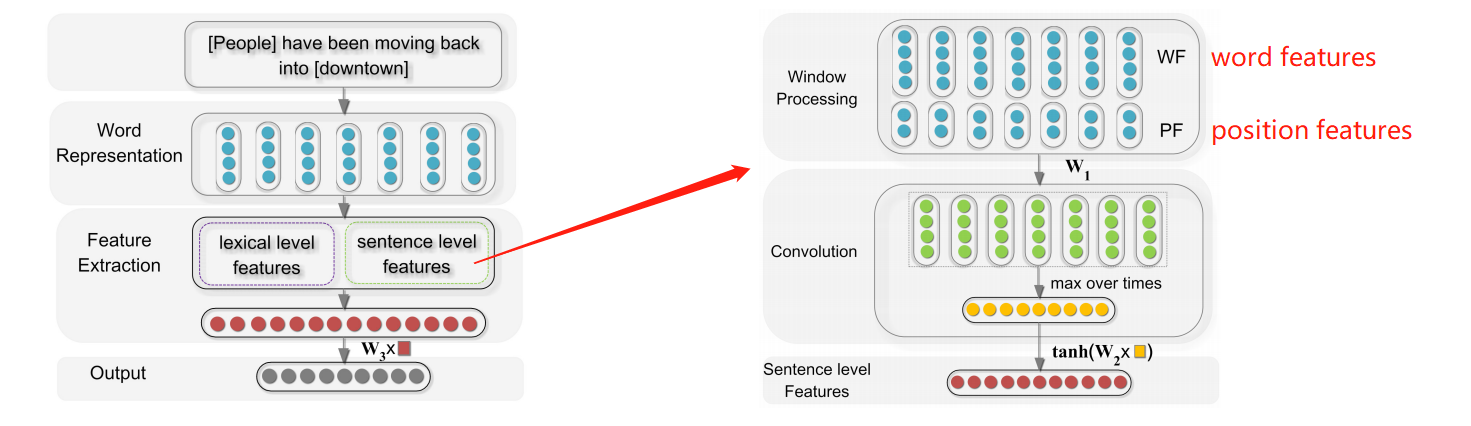
- 小结：该模型将关系抽取任务利用神经网络进行建模，利用无监督的词向量以及位置向量作为模型的主要输入特征，一定程度上避免了传统方法中的误差累计，但仍然有lexical level feature这个人工构造的特征，且CNN中的卷积核大小是固定的，抽取到的特征十分单一。


## 2.2 Relation Extraction: Perspective from Convolutional Neural Networks

## 2.3 Classifying Relations by Ranking with Convolutional Neural Networks

- 论文链接：https://www.aclweb.org/anthology/P15-1061/
- 论文时间：2015
- 源码：
- 复现：
- 类型：
- 简介：


## 2.4 Bidirectional Long Short-Term Memory Networks for Relation Classification

## 2.5 Attention-Based Bidirectional Long Short-Term Memory Networks for Relation Classification

## 2.6 Relation Classification via Multi-Level Attention CNNs

## 2.7 Bidirectional Recurrent Convolutional Neural Network for Relation Classification

## 2.8 A Novel Hierarchical Binary Tagging Framework for Joint Extraction of Entities and Relations

## 2.9 Span-based Joint Entity and Relation Extraction with Transformer Pre-training

## 2.10 Matching the Blanks: Distributional Similarity for Relation Learning

## 2.11 Joint Extraction of Entities and Relations Based on a Novel Decomposition Strategy